# Case Study

## Part 1

### Git & version control

1. Create a Github repository called "ames-housing-analysis".
1. Copy the ames.csv data from the `data/` directory into this repository.
1. Update the README with a short synopsis of this repo.

### Exploratory data analysis

1. In the repo's `notebooks/` folder, create a new notebook: `eda.ipynb`.

2. Load the ames.csv data.

In [1]:
import pandas as pd

ames = pd.read_csv("../data/ames.csv")

ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [2]:
ames.shape

(2930, 81)

3. Assess the distribution of the response variable (`Sale_Price`).

In [3]:
target = ames['Sale_Price']
target.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

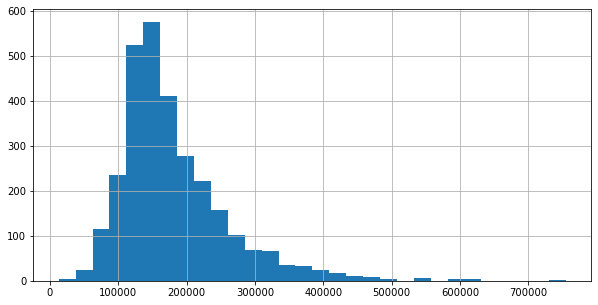

In [4]:
target.hist(figsize=(10, 5), bins=30);

4. How many features are numeric vs. categorical?

In [5]:
features = ames.drop(columns='Sale_Price')
features.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,5,2010,WD,Normal,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,4,2010,WD,Normal,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,-93.638933,42.060899


In [6]:
import numpy as np

num_features = features.select_dtypes(np.number)
cat_features = features.select_dtypes(object)

In [7]:
num_features.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Longitude,Latitude
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,62,0,0,0,0,0,5,2010,-93.619754,42.054035
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,120,0,0,6,2010,-93.619756,42.053014
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,36,0,0,0,0,12500,6,2010,-93.619387,42.052659
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,0,0,4,2010,-93.617320,42.051245
4,74,13830,1997,1998,0,3,0,137,928,928,...,34,0,0,0,0,0,3,2010,-93.638933,42.060899


In [8]:
cat_features.head()

,MS_SubClass,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Partial_Pavement,No_Pool,No_Fence,None,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,No_Fence,Gar2,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal


5. Pick a numeric feature that you believe would be influential on a home's `Sale_Price`. Assess the distribution of the numeric feature. Assess the relationship between that feature and the `Sale_Price`.

In [9]:
num_features.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude',
       'Latitude'],
      dtype='object')

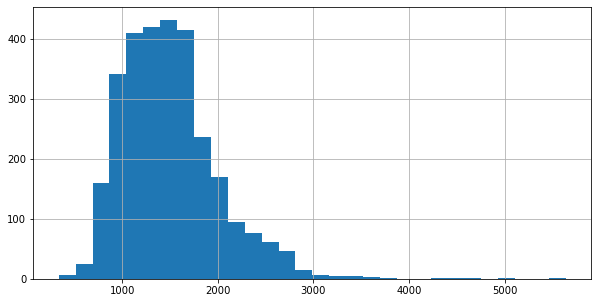

In [10]:
num_features['Gr_Liv_Area'].hist(figsize=(10, 5), bins=30);

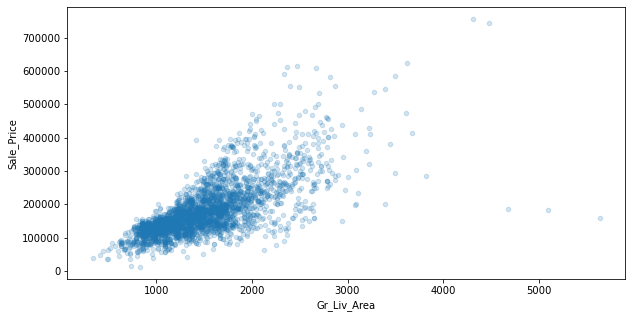

In [11]:
ames.plot.scatter(x='Gr_Liv_Area', y='Sale_Price', figsize=(10, 5), alpha=0.2);

6. Pick a categorical feature that you believe would be influential on a home's `Sale_Price`. Assess the distribution of the categorical feature. Assess the relationship between that feature and the `Sale_Price`.

In [12]:
cat_features.columns

Index(['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape',
       'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood',
       'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style',
       'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional',
       'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [13]:
cat_features['Overall_Qual'].value_counts()

Average           825
Above_Average     732
Good              602
Very_Good         350
Below_Average     226
Excellent         107
Fair               40
Very_Excellent     31
Poor               13
Very_Poor           4
Name: Overall_Qual, dtype: int64

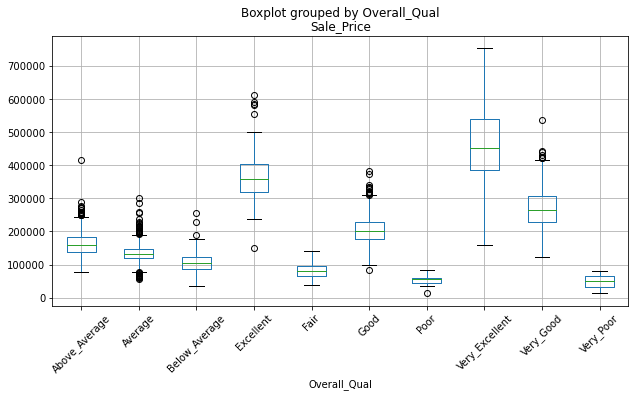

In [14]:
ames.boxplot(column='Sale_Price', by='Overall_Qual', figsize=(10,5), rot=45);

In [15]:
from pandas.api.types import CategoricalDtype

categories = ["Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Above_Average", 
              "Good", "Very_Good", "Excellent", "Very_Excellent"]
cat_type = CategoricalDtype(categories=categories, ordered=True)
ames['Overall_Qual'] = ames['Overall_Qual'].astype(cat_type)
ames['Overall_Qual']

0       Above_Average
1             Average
2       Above_Average
3                Good
4             Average
            ...      
2925    Above_Average
2926          Average
2927          Average
2928          Average
2929             Good
Name: Overall_Qual, Length: 2930, dtype: category
Categories (10, object): ['Very_Poor' < 'Poor' < 'Fair' < 'Below_Average' ... 'Good' < 'Very_Good' < 'Excellent' < 'Very_Excellent']

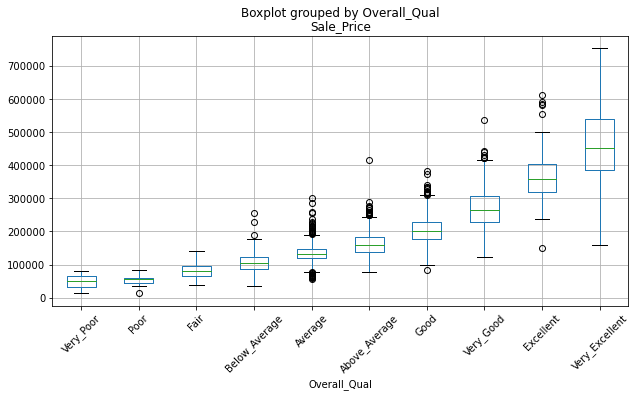

In [16]:
ames.boxplot(column='Sale_Price', by='Overall_Qual', figsize=(10,5), rot=45);

### Modular code & Scikit-learn model

1. Copy `my_module.py` (that we created together) into the notebooks folder.
2. Import your module and use `get_features_and_target` to load the numeric features of the Ames data, along with the "Sale_Price" as a target column.

In [17]:
from my_module import get_features_and_target
num_features, target = get_features_and_target('../data/ames.csv', 'Sale_Price')

With your features and target prepared:

1. Split the data into training and test sets. Use 75% of the data for training and 25% for testing.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    num_features, 
    target, 
    random_state=123, 
    test_size=0.25
)

2. Fit a default `KNeighborsRegressor` model on the training data and score on the test data. Note that scoring on regression models provides the $R^2$.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# 1. define the algorithm
knn_model = KNeighborsRegressor()

# 2. fit the model
knn_model.fit(X_train, y_train)

# 3. score our model on test data
knn_model.score(X_test, y_test)

0.6949157417705423

3. Fit a default `sklearn.linear_model.LinearRegression` model on the training data and score on the test data.

In [20]:
from sklearn.linear_model import LinearRegression

# 1. define the algorithm
lm_model = LinearRegression()

# 2. fit the model
lm_model.fit(X_train, y_train)

# 3. score our model on test data
lm_model.score(X_test, y_test)

0.8104251490010687

4. Fit a default `sklearn.ensemble.RandomForestRegressor` model on the training data and score on the test data.

In [21]:
from sklearn.ensemble import RandomForestRegressor

# 1. define the algorithm
rf_model = RandomForestRegressor()

# 2. fit the model
rf_model.fit(X_train, y_train)

# 3. score our model on test data
rf_model.score(X_test, y_test)

0.8726713762807132

### Feature engineering

1. Fill in the blanks to standardize the numeric features and then apply a linear regression model. Does standardizing the numeric features improve the linear regression's $R^2$?

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm_model_scaled = make_pipeline(StandardScaler(), LinearRegression())
lm_model_scaled.fit(X_train, y_train)
lm_model_scaled.score(X_test, y_test)

0.8105740990145595

2. Using the code chunks below, which computes the following:

- identifies numeric, categorical, and ordinal columns in our full feature set,
- replaces unique values in our ordinal columns (i.e. "No_basement", "No_garage"), and
- creates our encoders for the numeric, categorical, and ordinal columns.

<div class="admonition note alert alert-info">
    <p class="first admonition-title" style="font-weight: bold;"><b>Note</b></p>
<p class="last">Run the following two code cells without changing anything.</p>
</div>

In [23]:
# get columns of interest
numerical_columns = num_features.columns
ordinal_columns = cat_features.filter(regex='Qual').columns
categorical_columns = cat_features.drop(columns=ordinal_columns).columns

# replace unique values in our ordinal columns (i.e. "No_basement", "No_garage") with 'NA'
for col in ordinal_columns:
    features[col] = features[col].replace(to_replace='No_.*', value='NA', regex=True)
    
# split full feature set (numeric, categorical, & ordinal features) into train & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=123)

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# create our numeric, categorical, and ordinal preprocessor encoders
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

ordinal_categories = [
    "NA", "Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Typical",
    "Above_Average", "Good", "Very_Good", "Excellent", "Very_Excellent"
]
list_of_ord_cats = [ordinal_categories for col in ordinal_columns]
ordinal_preprocessor = OrdinalEncoder(categories=list_of_ord_cats)

2. Continued...

Now fill in the blanks to create our `ColumnTransformer` that:

- standardizes numerical columns
- one-hot encodes categorical columns
- ordinal encodes ordinal columns

In [25]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns),
    ('one_hot_encoder', categorical_preprocessor, categorical_columns),
    ('ordinal_encoder', ordinal_preprocessor, ordinal_columns),
])

3. Now create a pipeline that includes the preprocessing step and applies a linear regression model. Does this improve the linear regression's $R^2$?

In [26]:
lm_full = make_pipeline(preprocessor, LinearRegression())
_ = lm_full.fit(X_train, y_train)
lm_full.score(X_test, y_test)

0.8849929892348357

4. If time allows, apply these preprocessing steps with a default random forest model and see if performance improves.

In [27]:
rf_full = make_pipeline(preprocessor, RandomForestRegressor())
_ = rf_full.fit(X_train, y_train)
rf_full.score(X_test, y_test)

0.8976501325738776

### GitHub Check-in

Add, commit (with a good message!), and push your code to this point.

## Part 2

### Model evaluation & selection

1. Using same preprocessing pipeline you created in Part 1, fit a default random forest model using a 5-fold cross validation procedure using the root mean squared error metric (`'neg_root_mean_squared_error'`).

In [28]:
from sklearn.model_selection import cross_validate

rf = make_pipeline(preprocessor, RandomForestRegressor())
cross_validate(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

{'fit_time': array([22.80134368, 22.43584871, 22.33308744, 22.83984756, 23.4647584 ]),
 'score_time': array([0.04035902, 0.05869246, 0.0709486 , 0.07106495, 0.05878043]),
 'test_score': array([-26203.26091701, -27316.65213223, -23293.34486154, -30467.52836246,
        -26653.87383842])}

2. Run the following two code chunks as is without making any changes. This will create a random forest model pipeline and create specified hyperparameter distributions to draw from.

In [29]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [30]:
from sklearn.pipeline import Pipeline

# create preprocessor & modeling pipeline
rf = RandomForestRegressor(random_state=123)
pipeline = Pipeline([('prep', preprocessor), ('rf', rf)])

# specify hyperparameter distributions to randomly sample from
param_distributions = {
    'rf__n_estimators': loguniform_int(50, 1000),
    'rf__max_features': loguniform(.1, .8),
    'rf__max_depth': loguniform_int(2, 30),
    'rf__min_samples_leaf': loguniform_int(1, 100),
    'rf__max_samples': loguniform(.5, 1),
}

2. Continued...

Fill in the blanks to perform a random hyperparameter search based on the following:

- use the parameter distributions specified above,
- perform 25 random searches,
- use a 5-fold cross-validation procedure, and
- use root mean squared error (RMSE) as our scoring metric.

What are the hyperparameters that provide the lowest RMSE? What is the lowest cross validated RMSE?

In [31]:
%%time
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=25,
    cv=5, 
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
)

results = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wall time: 1min 19s


In [32]:
results.best_score_

-26858.899257349247

In [33]:
results.best_params_

{'rf__max_depth': 12,
 'rf__max_features': 0.3115167886546901,
 'rf__max_samples': 0.6091935405174403,
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 500}

### Modular code & unit tests

1. Move the `loguniform_int` class we defined above into a new module, `loguniform_int.py`. We haven't put classes into modules before, but it's no different than a function; just paste it along with any imports it needs.

Your new module should contain something like:

```python
from scipy.stats import loguniform

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)
```

2. Import your module and make sure you can use it in code by (re)running the below:

In [34]:
from loguniform_int import loguniform_int

param_distributions = {
    'rf__n_estimators': loguniform_int(50, 1000),
    'rf__max_features': loguniform(.1, .8),
    'rf__max_depth': loguniform_int(2, 30),
    'rf__min_samples_leaf': loguniform_int(1, 100),
    'rf__max_samples': loguniform(.5, 1),
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, # lower this to 10 so it's faster
    cv=5, 
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
)

results2 = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


3. Create a `tests.py` file in which you add the tests we already create for `get_features_and_target` (you can just copy them), along with a new test that asserts that `loguniform` objects have a `._distribution.args` attribute that holds the original numbers passed into them -- confirming that we did indeed create the kind of distribution we expected. Run the tests when finished.

```python
>>> lu = loguniform_int(2, 30)
>>> lu._distribution.args
(2, 30)
```

In [35]:
# New contents of tests.py
from loguniform_int import loguniform_int

def test_loguniform_int_args():
    lu = loguniform_int(2, 30)
    assert lu._distribution.args == (2, 30)

4. Parametrize this test. Create one `loguniform_int` with `(2, 30)` as the arguments and another with `(1, 100)` as the arguments. Confirm that in both cases, the resulting `._distribution.args` attribute holds a tuple with the same numbers that were supplied initially. Rerun your tests.

In [36]:
# New contents of tests.py
from loguniform_int import loguniform_int
import pytest

@pytest.mark.parametrize('arg1,arg2', [(2, 30), (1, 100)])
def test_loguniform_int_args(arg1, arg2):
    lu = loguniform_int(arg1, arg2)
    assert lu._distribution.args == (arg1, arg2)

### ML lifecycle management

1. Create and set an MLflow experiment titled "UC Advanced Python Case Study"

In [37]:
import mlflow

mlflow.set_experiment("UC Advanced Python Case Study")

<Experiment: artifact_location='file:///C:/Users/eswan/Downloads/advanced-python-datasci/notebooks/mlruns/1', experiment_id='1', lifecycle_stage='active', name='UC Advanced Python Case Study', tags={}>

2. Re-perform the random hyperparameter search executed above while logging the hyperparameter search experiment with MLflow's autologging. Title this run "rf_hyperparameter_tuning".

In [38]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run(run_name='rf_hyperparameter_tuning') as run:
    random_search = RandomizedSearchCV(
        pipeline, 
        param_distributions=param_distributions, 
        n_iter=25,
        cv=5, 
        scoring='neg_root_mean_squared_error',
        verbose=1,
        n_jobs=-1,
    )
    results = random_search.fit(X_train, y_train)

2022/01/07 21:57:18 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  Index(['Lot_Frontage', 'Lot_Area', ...`
2022/01/07 21:57:18 WARNING mlflow.utils: Truncated the value of the key `param_distributions`. Truncated value: `{'rf__n_estimators': <loguniform_int.loguniform_int object at 0x000001508C8CFDF0>, 'rf__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001508A8AEA30>, 'rf__max_depth': <loguniform_int.loguniform_int object at 0x00000150...`


Fitting 5 folds for each of 25 candidates, totalling 125 fits


2022/01/07 21:59:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\eswan\Anaconda3\envs\uc-python\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2022/01/07 21:59:48 INFO mlflow.sklearn.utils: Logging the 5 best runs, 20 runs will be omitted.
2022/01/07 21:59:48 WARNING mlflow.utils:

In [ ]:
#!mlflow ui

### Final GitHub Commit

When finished, add, commit, and push your code.